- Vary Latent Space (2,8,16,32)
- Visualize Latent Space by using Dimensionality Reduction Technique (https://hackernoon.com/latent-space-visualization-deep-learning-bits-2-bd09a46920df)
- Implement GIF from Medium Article https://medium.com/@outerrencedl/a-simple-autoencoder-and-latent-space-visualization-with-pytorch-568e4cd2112a
    - Plot Latent Space afte each Training Step to see how it learns 

In [2]:
!pip3 install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Vanilla Autoencoder

Chosen Hyperparamter as similar to

2024-11-19 14:41:48.941892: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-19 14:41:48.943090: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-19 14:41:48.947012: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-19 14:41:48.955611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732023708.967003   37921 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732023708.97

Found 256 images belonging to 1 classes.
Found 64 images belonging to 1 classes.
Found 160 images belonging to 6 classes.


W0000 00:00:1732023710.236963   37921 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    67,109,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (LeakyReLU)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 65536)          │    67,174,400 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 135,067,779 (515.24 MB)

 Trainable params: 135,064,323 (515.23 MB)

 Non-trainable params: 3,456 (13.50 KB)

/home/ucloud/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2024-11-19 14:41:53.945239: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 789ms/step - loss: 0.1458 - val_loss: 0.2611
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 722ms/step - loss: 0.0454 - val_loss: 0.2573
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 736ms/step - loss: 0.0388 - val_loss: 0.1504
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 726ms/step - loss: 0.0344 - val_loss: 0.0609
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 723ms/step - loss: 0.0322 - val_loss: 0.1334
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 726ms/step - loss: 0.0304 - val_loss: 0.1370
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 713ms/step - loss: 0.0305 - val_loss: 0.1495
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 724ms/step - loss: 0.0279 - val_loss: 0.1338
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 727ms/step - loss: 0.0260 - val_loss: 0.1314
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 722ms/step - loss: 0.0254 - val_loss: 0.1443
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 714ms/step - loss: 0.0247 - val_loss: 0.1321
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 725ms/ste

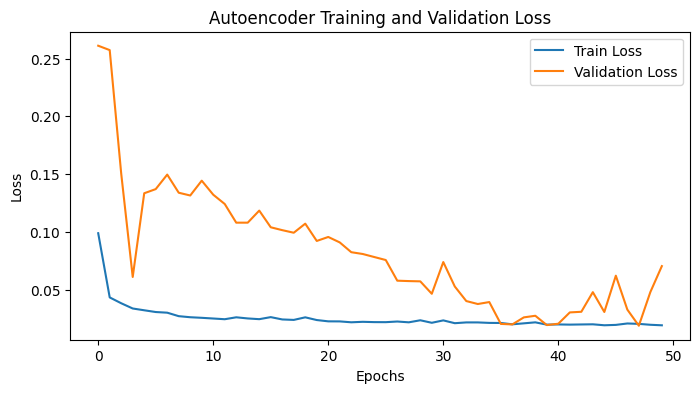

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Flatten, Dense, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set up device configuration for M1 GPU if available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)


#######################
###### Load Data ######

# Image preprocessing and augmentation
category = 'screw'
data_dir = f'data/{category}'
train_dir = f'{data_dir}/train'
test_dir = f'{data_dir}/test'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='input',
    color_mode='rgb',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='input',
    color_mode='rgb',
    subset='validation'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='input',
    color_mode='rgb',
    shuffle=False
)


##########################
###### Create Model ######

def build_autoencoder(input_shape=(256, 256, 3)):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), padding='same')(input_img)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # (128, 128, 32)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # (64, 64, 64)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # (32, 32, 128)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # (16, 16, 256)

    # Bottleneck
    x = Flatten()(x)             # Flattened Shape: (16 * 16 * 256,) = (65,536,)
    encoded = Dense(1024)(x)      # Latent space size: 128
    encoded = BatchNormalization()(encoded)
    encoded = LeakyReLU(name='bottleneck')(encoded)

    # Decoder
    x = Dense(16 * 16 * 256)(encoded)
    x = Reshape((16, 16, 256))(x)

    x = UpSampling2D((2, 2))(x)  # (32, 32, 256)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = UpSampling2D((2, 2))(x)  # (64, 64, 128)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = UpSampling2D((2, 2))(x)  # (128, 128, 64)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = UpSampling2D((2, 2))(x)  # (256, 256, 32)
    x = Conv2D(input_shape[2], (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, x)
    autoencoder.compile(optimizer='adam', loss='mae')
    # autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Build and summarize the model
autoencoder = build_autoencoder()
autoencoder.summary()


###############################
###### Train Autoencoder ###### 

import math

steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)


# Train the autoencoder
history = autoencoder.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
)

# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Optional: Save model
# autoencoder.save('autoencoder_model.h5')


## Plot Reconstructions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


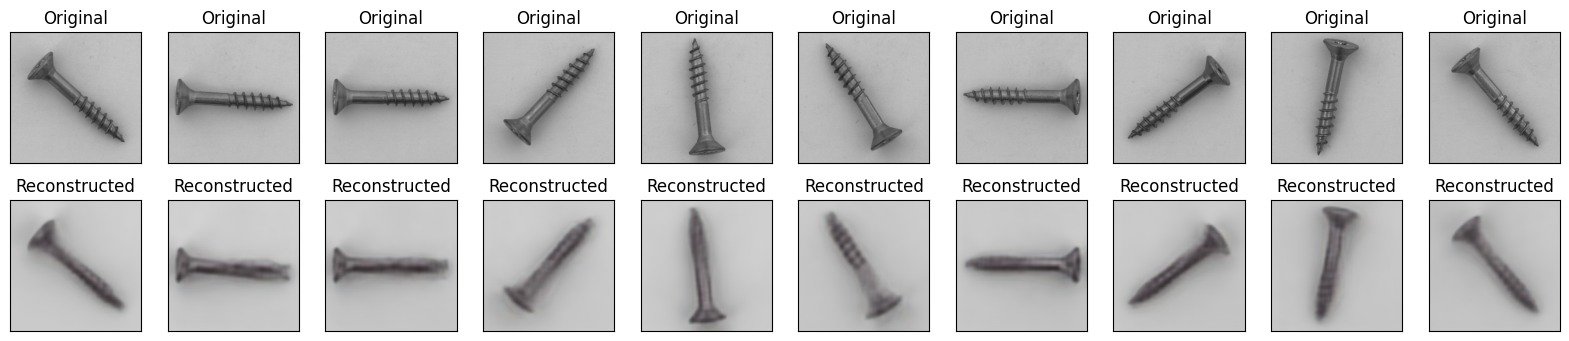

In [4]:
import numpy as np
# Fetch a batch of images
original_images, _ = next(test_generator)  # Ignore labels since class_mode='input'

# Generate reconstructions
reconstructed_images = autoencoder.predict(original_images)

# Ensure the images are in float32 and within the range [0, 1]
original_images = original_images.astype('float32')
reconstructed_images = np.clip(reconstructed_images.astype('float32'), 0, 1)

def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

plot_images(original_images, reconstructed_images, n=10)

## Evaluate the Autoencoder

Found 64 images belonging to 1 classes.


Total number of images in validation set: 64
Reconstructing image batch No 1 out of 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
Reconstructing image batch No 2 out of 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Applied Threshoold is: 0.0732923075556755


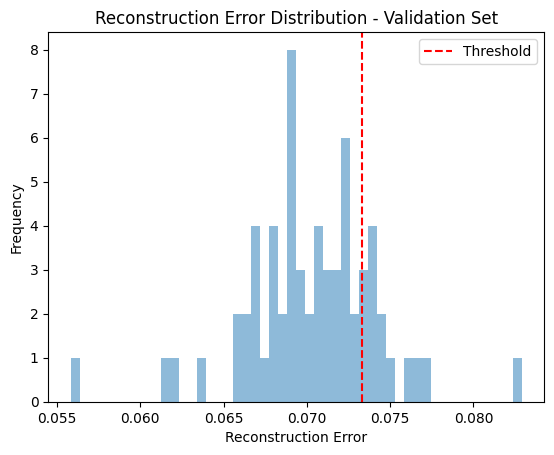

Found 160 images belonging to 6 classes.
Total number of images in test set: 160
Class Indices: {'good': 0, 'manipulated_front': 1, 'scratch_head': 2, 'scratch_neck': 3, 'thread_side': 4, 'thread_top': 5}
Reconstructing image batch No 1 out of 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Reconstructing image batch No 2 out of 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Reconstructing image batch No 3 out of 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Reconstructing image batch No 4 out of 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Reconstructing image batch No 5 out of 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
              precision    recall  f1-score   support

      Normal       0.34      1.00      0.51        41
     Anomaly       1.00      0.34      0.51       119

    accuracy                           0.51       160
   macro avg       0.67      0.67      0.51       160
weighted avg       0.83      0.51      0.51       160

Confusion Matrix:
 [[41  0]
 [78 41]]
Anomalies detected:41
Anomalie

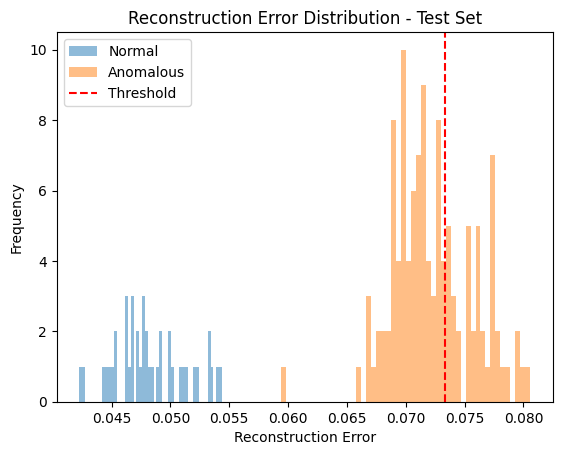

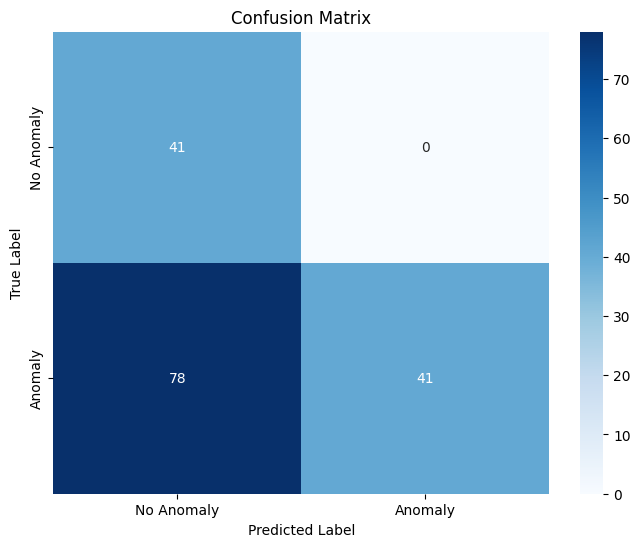

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

###############################
###### Calculate Threshold ####
# Image preprocessing and augmentation
category = 'screw'
data_dir = f'data/{category}'
train_dir = f'{data_dir}/train'
test_dir = f'{data_dir}/test'
# Configure ImageDataGenerator to automatically generate labels based on subfolder structure
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='input',  # Use 'input' since we're reconstructing images
    shuffle=False,
    subset='validation'  # Specify the validation subset
)

# Print the total number of images in the test set
print(f"Total number of images in validation set: {validation_generator.samples}")

# Calculate the number of batches in the validation set
num_val_batches = int(np.ceil(validation_generator.samples / validation_generator.batch_size))

# Function to caluculate errors of the validation set, used to calculate the treshold
def calculate_validation_errors(autoencoder, validation_generator, num_val_batches):
    val_errors = []
    for i, (batch_images, _) in enumerate(validation_generator):
        if i >= num_val_batches:
            break
        print(f"Reconstructing image batch No {i+1} out of {num_val_batches}")
        # Use batch_images for prediction
        reconstructed_batch = autoencoder.predict(batch_images)
        # Compute reconstruction error
        batch_errors = np.mean(np.abs(batch_images - reconstructed_batch), axis=(1, 2, 3))
        # batch_errors = np.mean(np.square(batch_images - reconstructed_batch), axis=(1, 2, 3))
        val_errors.extend(batch_errors)
    return np.array(val_errors)

validation_errors = calculate_validation_errors(autoencoder, validation_generator, num_val_batches)


# Using the 80th percentile to set the threshold
threshold = np.percentile(validation_errors, 80)
print(f"Applied Threshoold is: {threshold}")

# Plot econstruction Error Distribution
plt.hist(validation_errors, bins=50, alpha=0.5)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution - Validation Set')
plt.show()


###############################
######### Test AE #############

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',  # To get labels for evaluation
    shuffle=False
)
# Print the total number of images in the test set
print(f"Total number of images in test set: {test_generator.samples}")

class_indices = test_generator.class_indices
print("Class Indices:", class_indices)

num_test_batches = int(np.ceil(test_generator.samples / test_generator.batch_size))

def calculate_test_errors_and_labels(autoencoder, test_generator, num_test_batches):
    test_errors = []
    true_labels = []
    for i, (batch_images, batch_labels) in enumerate(test_generator):
        if i >= num_test_batches:
            break
        print(f"Reconstructing image batch No {i+1} out of {num_test_batches}")
        reconstructed_batch = autoencoder.predict(batch_images)
        batch_errors = np.mean(np.abs(batch_images - reconstructed_batch), axis=(1, 2, 3))
        # batch_errors = np.mean(np.square(batch_images - reconstructed_batch), axis=(1, 2, 3))
        test_errors.extend(batch_errors)
        true_labels.extend(batch_labels)
    return np.array(test_errors), np.array(true_labels)

test_errors, true_labels = calculate_test_errors_and_labels(autoencoder, test_generator, num_test_batches)

# generating correct labels
#true_labels = np.where((true_labels == [1, 0, 0, 0, 0, 0]).all(axis=1), 0, 1) 
class_indices = test_generator.class_indices
good_class_index = class_indices['good']
true_labels_indices = np.argmax(true_labels, axis=1)
true_labels = np.where(true_labels_indices == good_class_index, 0, 1)

#############################
######### Classify ##########

# Predicted labels: 0 for normal (error <= threshold), 1 for anomaly (error > threshold)
predicted_labels = (test_errors > threshold).astype(int)



#############################
######### Evaluate ##########

print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly']))
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)
print(f"Anomalies detected:{sum(predicted_labels)}")
print(f"Anomalies in test set:{sum(true_labels)}")



# Reconstruction Error Distribution
normal_errors = test_errors[true_labels == 0]
anomalous_errors = test_errors[true_labels == 1]

plt.hist(normal_errors, bins=50, alpha=0.5, label='Normal')
plt.hist(anomalous_errors, bins=50, alpha=0.5, label='Anomalous')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution - Test Set')
plt.show()


# Confusion Matrix
class_names = ['No Anomaly', 'Anomaly']

# Optionally normalize the confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a pandas DataFrame for the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Plot using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Detect anomalies with the AE

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(256, 256)):
    """Load and preprocess an image for the autoencoder."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0  # Normalize to [0, 1] and set to float32
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def calculate_reconstruction_error(original, reconstructed):
    """Calculate the mean absolute error between original and reconstructed images."""
    # return np.mean((original - reconstructed) ** 2)
    return np.mean(np.abs(original - reconstructed))

def predict_anomaly_and_plot(autoencoder, image_path, mask_dir, threshold=0.02):
    """
    Predict if an image is an anomaly based on reconstruction error
    and plot original, reconstructed, and mask images.
    
    Parameters:
        autoencoder (Model): The trained autoencoder model.
        image_path (str): Path to the image file.
        mask_dir (str): Directory containing anomaly mask images.
        threshold (float): Error threshold to classify as anomaly.
    
    Returns:
        bool: True if anomaly, False otherwise.
        float: The reconstruction error.
    """
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Reconstruct the image with the autoencoder
    reconstructed_img = autoencoder.predict(img)

    # Ensure reconstructed image is in float32 format
    reconstructed_img = reconstructed_img.astype('float32')
    
    # Calculate reconstruction error
    error = calculate_reconstruction_error(img, reconstructed_img)
    
    # Classify as anomaly if error exceeds the threshold
    is_anomaly = error > threshold

    # Generate the corresponding mask path
    file_name = os.path.basename(image_path).split('.')[0] + '_mask.png'
    label = os.path.basename(os.path.dirname(image_path))
    mask_path = os.path.join(mask_dir, label, file_name)
    
    # Load the mask image if it exists
    if os.path.exists(mask_path):
        mask_img = plt.imread(mask_path)
    else:
        mask_img = None

    # Plot original, reconstructed, and mask images
    plt.figure(figsize=(12, 4))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(img[0])  # Remove batch dimension for display
    plt.title("Original Image")
    plt.axis("off")
    
    # Reconstructed image
    plt.subplot(1, 3, 2)
    plt.imshow(reconstructed_img[0])  # Remove batch dimension for display
    plt.title("Reconstructed Image")
    plt.axis("off")
    
    # Anomaly mask
    plt.subplot(1, 3, 3)
    if mask_img is not None:
        plt.imshow(mask_img, cmap="gray")
        plt.title("Anomaly Mask")
    else:
        plt.text(0.5, 0.5, 'No Mask Available', ha='center', va='center', fontsize=12)
    plt.axis("off")
    
    plt.suptitle(f"Reconstruction Error: {error:.4f}| Threshold: {threshold} | Anomaly: {'Yes' if is_anomaly else 'No'}")
    plt.show()
    
    return is_anomaly, error

# Example usage
mask_dir = 'data/screw/ground_truth'
image_paths = [
    'data/screw/test/manipulated_front/001.png',
    'data/screw/test/scratch_head/001.png', 
    'data/screw/test/scratch_neck/001.png' 
]

for path in image_paths: 
    is_anomaly, error = predict_anomaly_and_plot(autoencoder, path, mask_dir, threshold=threshold)


ImportError: libGL.so.1: cannot open shared object file: No such file or directory

### Evaluate AE for new classes

Found 78 images belonging to 1 classes.


Total number of images in validation set: 78
Reconstructing image batch No 1 out of 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Reconstructing image batch No 2 out of 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Reconstructing image batch No 3 out of 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Applied Threshoold is: 0.5095167756080627


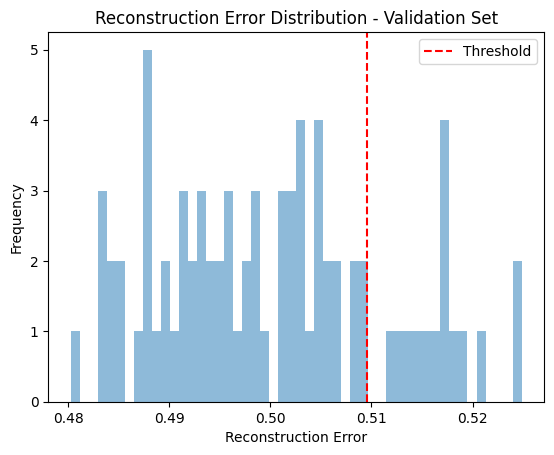

Found 110 images belonging to 5 classes.
Total number of images in test set: 110
Class Indices: {'crack': 0, 'cut': 1, 'good': 2, 'hole': 3, 'print': 4}
Reconstructing image batch No 1 out of 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Reconstructing image batch No 2 out of 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Reconstructing image batch No 3 out of 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Reconstructing image batch No 4 out of 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
              precision    recall  f1-score   support

      Normal       0.38      1.00      0.55        40
     Anomaly       1.00      0.06      0.11        70

    accuracy                           0.40       110
   macro avg       0.69      0.53      0.33       110
weighted avg       0.77      0.40      0.27       110

Confusion Matrix:
 [[40  0]
 [66  4]]
Anomalies detected:4
Anomalies in test set:70


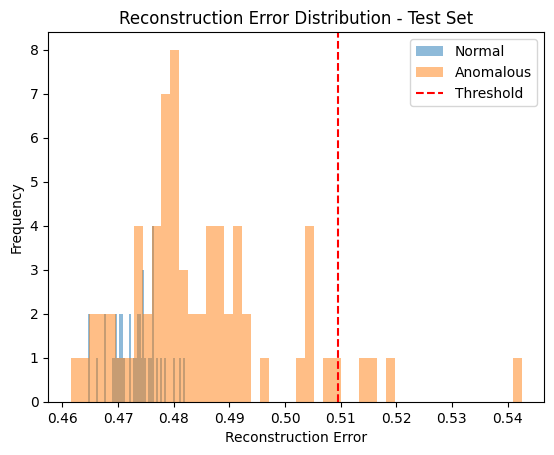

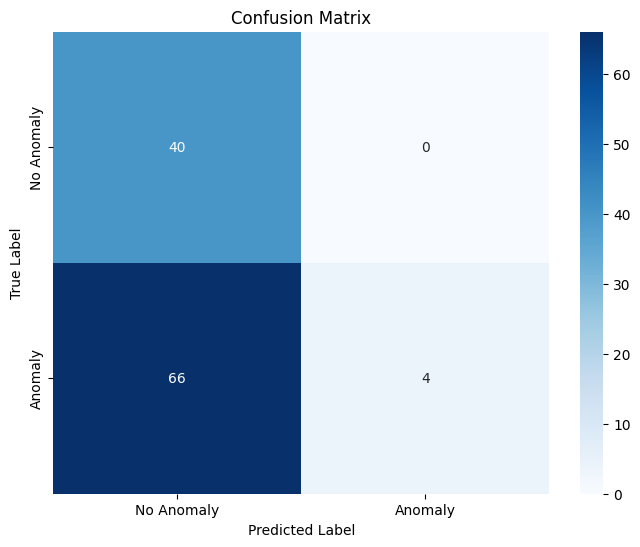

In [8]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

###############################
###### Calculate Threshold ####
# Image preprocessing and augmentation
category = 'hazelnut'
data_dir = f'data/{category}'
train_dir = f'{data_dir}/train'
test_dir = f'{data_dir}/test'
# Configure ImageDataGenerator to automatically generate labels based on subfolder structure
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='input',  # Use 'input' since we're reconstructing images
    shuffle=False,
    subset='validation'  # Specify the validation subset
)

# Print the total number of images in the test set
print(f"Total number of images in validation set: {validation_generator.samples}")

# Calculate the number of batches in the validation set
num_val_batches = int(np.ceil(validation_generator.samples / validation_generator.batch_size))

validation_errors = calculate_validation_errors(autoencoder, validation_generator, num_val_batches)


# Using the 80th percentile to set the threshold
threshold = np.percentile(validation_errors, 80)
print(f"Applied Threshoold is: {threshold}")

# Plot econstruction Error Distribution
plt.hist(validation_errors, bins=50, alpha=0.5)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution - Validation Set')
plt.show()


###############################
######### Test AE #############

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',  # To get labels for evaluation
    shuffle=False
)
# Print the total number of images in the test set
print(f"Total number of images in test set: {test_generator.samples}")

class_indices = test_generator.class_indices
print("Class Indices:", class_indices)

num_test_batches = int(np.ceil(test_generator.samples / test_generator.batch_size))

test_errors, true_labels = calculate_test_errors_and_labels(autoencoder, test_generator, num_test_batches)

# generating correct labels
#true_labels = np.where((true_labels == [1, 0, 0, 0, 0, 0]).all(axis=1), 0, 1) 
class_indices = test_generator.class_indices
good_class_index = class_indices['good']
true_labels_indices = np.argmax(true_labels, axis=1)
true_labels = np.where(true_labels_indices == good_class_index, 0, 1)

#############################
######### Classify ##########

# Predicted labels: 0 for normal (error <= threshold), 1 for anomaly (error > threshold)
predicted_labels = (test_errors > threshold).astype(int)



#############################
######### Evaluate ##########

print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly']))
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)
print(f"Anomalies detected:{sum(predicted_labels)}")
print(f"Anomalies in test set:{sum(true_labels)}")



# Reconstruction Error Distribution
normal_errors = test_errors[true_labels == 0]
anomalous_errors = test_errors[true_labels == 1]

plt.hist(normal_errors, bins=50, alpha=0.5, label='Normal')
plt.hist(anomalous_errors, bins=50, alpha=0.5, label='Anomalous')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution - Test Set')
plt.show()


# Confusion Matrix
class_names = ['No Anomaly', 'Anomaly']

# Optionally normalize the confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a pandas DataFrame for the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Plot using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Visualise Latent Space

Found 160 images belonging to 6 classes.
Total number of images in test set: 160
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


/home/ucloud/.local/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Class Indices: {'good': 0, 'anomaly': 1}


/tmp/ipykernel_37921/3210851997.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', num_classes)


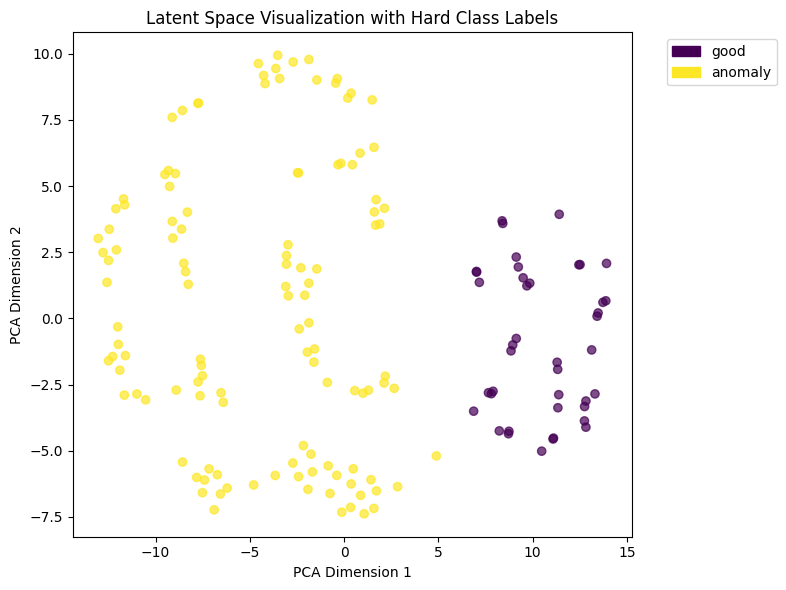

In [9]:
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the category and data directories
category = 'screw'
data_dir = f'data/{category}'
test_dir = f'{data_dir}/test'

# Configure ImageDataGenerator without validation_split for the test data
datagen = ImageDataGenerator(rescale=1./255)

# Create the test data generator without validation split
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,  # You can adjust this as needed
    class_mode='categorical',  # Or 'input' if labels are not needed
    shuffle=False
)

# Print the total number of images in the test dataset
print(f"Total number of images in test set: {test_generator.samples}")

# Get Bottleneck layer from the Encoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('bottleneck').output)

# Collect all images and labels from the test generator
all_images = []
all_labels = []

# Calculate the number of batches in the test generator
num_batches = int(np.ceil(test_generator.samples / test_generator.batch_size))

for i in range(num_batches):
    images_batch, labels_batch = next(test_generator)
    all_images.append(images_batch)
    all_labels.append(labels_batch)

# Concatenate all batches to get the full dataset
original_images = np.concatenate(all_images)
labels = np.concatenate(all_labels)

# Convert one-hot encoded labels to class indices
#labels_indices = np.argmax(labels, axis=1)
labels_indices = np.where((labels == [1, 0, 0, 0, 0, 0]).all(axis=1), 0, 1) 

# Get latent representations for all images
latent_representations = encoder.predict(original_images)

# Flatten the spatial dimensions of the latent representations
num_samples = latent_representations.shape[0]
latent_dimensionality = np.prod(latent_representations.shape[1:])
latent_flat = latent_representations.reshape(num_samples, latent_dimensionality)

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
latent_2d = tsne.fit_transform(latent_flat)

# Get class indices mapping
#class_indices = test_generator.class_indices
class_indices = {'good': 0, 'anomaly': 1}
print("Class Indices:", class_indices)
index_to_class = {v: k for k, v in class_indices.items()}

# Number of unique classes
num_classes = len(class_indices)

# Use a discrete colormap suitable for the number of classes

cmap = plt.cm.get_cmap('viridis', num_classes)

# Create a list of patches for the legend
patches = [mpatches.Patch(color=cmap(i), label=index_to_class[i]) for i in range(num_classes)]

# Plot the latent space with hard class labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1],
                      c=labels_indices, cmap=cmap, alpha=0.7)
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Latent Space Visualization with Hard Class Labels')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.tight_layout()
plt.show()
